# CIFAR-10 Image Classification

In [1]:
%load_ext autoreload
%autoreload 2

In [33]:
import os
import requests
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

from data_loader.data_loader import DataLoaderCIFAR10
from trainer.trainer import TrainerCNN

## Prepare

In [3]:
url_base = f'http://{os.environ["AI_DASHBORARD_IPADDR"]}:1317/api/'
dataset_dir_base = '/tf/data'

In [4]:
project_list = requests.get(url_base+'get_project_list')
project_list.json()

[{'name': 'Sample Project', 'id': 1}]

In [5]:
dataset_list = requests.get(url_base+'get_dataset_list')
dataset_list.json()

[{'name': 'CIFAR-10',
  'project': 1,
  'dataset_dir_offset': 'ae5ce162888ee3ebe974976cac5ab94a3f55049f8515884883d579fb3fa378d2/dataset_2'}]

## Load dataset

In [20]:
dataset_dir = dataset_list.json()[0]['dataset_dir_offset']
dataloader = DataLoaderCIFAR10(Path(dataset_dir_base, dataset_dir), validation_split=0.2, one_hot=True)

In [21]:
print(f'train_images shape: {dataloader.train_images.shape}')
print(f'validation_images shape: {dataloader.validation_images.shape}')
print(f'test_images shape: {dataloader.test_images.shape}')

train_images shape: (40000, 32, 32, 3)
validation_images shape: (10000, 32, 32, 3)
test_images shape: (10000, 32, 32, 3)


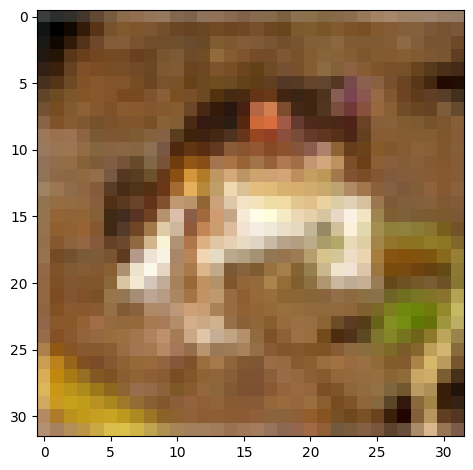

In [22]:
img = dataloader.train_images[0]
plt.imshow(img)
plt.grid(False)
plt.tight_layout()
plt.show()

## Training

In [23]:
result_dir = 'output'

In [24]:
trainer = TrainerCNN(dataloader.train_images.shape[1:],
    output_dir=result_dir,
    optimizer='adam', loss='categorical_crossentropy', initializer='he_normal')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 2, 2, 64)        

In [25]:
x_train, x_val, x_test = dataloader.normalization('max')
y_train = dataloader.train_labels
y_val = dataloader.validation_labels
y_test = dataloader.test_labels
output_dims = dataloader.output_dims

data_augmentation = {
    'rotation_range': 5,
    'width_shift_range': 0.2,
    'height_shift_range': 0.2,
    'zoom_range': 0.2,
    'channel_shift_range': 0.2,
    'horizontal_flip': True,
}

In [26]:
trainer.fit(x_train, y_train, x_val=x_val, y_val=y_val, x_test=x_test, y_test=y_test,
    batch_size=32, da_params=data_augmentation, epochs=400)


Epoch 1: saving model to output/checkpoints/model.ckpt
End epoch 0: (loss = 1.8178781270980835), (accuracy = 0.32692500948905945), (val_loss = 1.4709099531173706), (val_accuracy = 0.4724000096321106)

Epoch 2: saving model to output/checkpoints/model.ckpt
End epoch 1: (loss = 1.553960919380188), (accuracy = 0.436599999666214), (val_loss = 1.321825385093689), (val_accuracy = 0.5293999910354614)

Epoch 3: saving model to output/checkpoints/model.ckpt
End epoch 2: (loss = 1.4370050430297852), (accuracy = 0.48304998874664307), (val_loss = 1.275252103805542), (val_accuracy = 0.5465999841690063)

Epoch 4: saving model to output/checkpoints/model.ckpt
End epoch 3: (loss = 1.3627686500549316), (accuracy = 0.5134249925613403), (val_loss = 1.1417951583862305), (val_accuracy = 0.5943999886512756)

Epoch 5: saving model to output/checkpoints/model.ckpt
End epoch 4: (loss = 1.3091437816619873), (accuracy = 0.5351499915122986), (val_loss = 1.1868785619735718), (val_accuracy = 0.5777000188827515)

E


Epoch 42: saving model to output/checkpoints/model.ckpt
End epoch 41: (loss = 0.9018700122833252), (accuracy = 0.6857249736785889), (val_loss = 0.8822889924049377), (val_accuracy = 0.6962000131607056)

Epoch 43: saving model to output/checkpoints/model.ckpt
End epoch 42: (loss = 0.8978009819984436), (accuracy = 0.6869249939918518), (val_loss = 0.8495029211044312), (val_accuracy = 0.7060999870300293)

Epoch 44: saving model to output/checkpoints/model.ckpt
End epoch 43: (loss = 0.8966799974441528), (accuracy = 0.6855499744415283), (val_loss = 0.8080015182495117), (val_accuracy = 0.7246999740600586)

Epoch 45: saving model to output/checkpoints/model.ckpt
End epoch 44: (loss = 0.8936649560928345), (accuracy = 0.6889749765396118), (val_loss = 0.7939286231994629), (val_accuracy = 0.7264999747276306)

Epoch 46: saving model to output/checkpoints/model.ckpt
End epoch 45: (loss = 0.8925790786743164), (accuracy = 0.6896250247955322), (val_loss = 0.8158133029937744), (val_accuracy = 0.72030001


Epoch 83: saving model to output/checkpoints/model.ckpt
End epoch 82: (loss = 0.8132272958755493), (accuracy = 0.7172750234603882), (val_loss = 0.8348700404167175), (val_accuracy = 0.7236999869346619)

Epoch 84: saving model to output/checkpoints/model.ckpt
End epoch 83: (loss = 0.8164825439453125), (accuracy = 0.7185249924659729), (val_loss = 0.6845577955245972), (val_accuracy = 0.7656999826431274)

Epoch 85: saving model to output/checkpoints/model.ckpt
End epoch 84: (loss = 0.811037540435791), (accuracy = 0.7182250022888184), (val_loss = 0.7671792507171631), (val_accuracy = 0.7405999898910522)

Epoch 86: saving model to output/checkpoints/model.ckpt
End epoch 85: (loss = 0.8073786497116089), (accuracy = 0.7209749817848206), (val_loss = 0.7518731951713562), (val_accuracy = 0.7455999851226807)

Epoch 87: saving model to output/checkpoints/model.ckpt
End epoch 86: (loss = 0.8079980611801147), (accuracy = 0.7208750247955322), (val_loss = 0.7949787974357605), (val_accuracy = 0.733600020


Epoch 124: saving model to output/checkpoints/model.ckpt
End epoch 123: (loss = 0.7710122466087341), (accuracy = 0.7338500022888184), (val_loss = 0.7026336193084717), (val_accuracy = 0.7642999887466431)

Epoch 125: saving model to output/checkpoints/model.ckpt
End epoch 124: (loss = 0.7696817517280579), (accuracy = 0.7338749766349792), (val_loss = 0.6650657653808594), (val_accuracy = 0.7803999781608582)

Epoch 126: saving model to output/checkpoints/model.ckpt
End epoch 125: (loss = 0.7725108861923218), (accuracy = 0.7339249849319458), (val_loss = 0.6843327879905701), (val_accuracy = 0.7703999876976013)

Epoch 127: saving model to output/checkpoints/model.ckpt
End epoch 126: (loss = 0.7713469862937927), (accuracy = 0.7334750294685364), (val_loss = 0.6857964992523193), (val_accuracy = 0.7696999907493591)

Epoch 128: saving model to output/checkpoints/model.ckpt
End epoch 127: (loss = 0.7776682376861572), (accuracy = 0.729200005531311), (val_loss = 0.7168351411819458), (val_accuracy = 0

End epoch 163: (loss = 0.7507168650627136), (accuracy = 0.7403500080108643), (val_loss = 0.7361516952514648), (val_accuracy = 0.7608000040054321)

Epoch 165: saving model to output/checkpoints/model.ckpt
End epoch 164: (loss = 0.7476428747177124), (accuracy = 0.740975022315979), (val_loss = 0.7030361294746399), (val_accuracy = 0.7695000171661377)

Epoch 166: saving model to output/checkpoints/model.ckpt
End epoch 165: (loss = 0.7443344593048096), (accuracy = 0.7412750124931335), (val_loss = 0.6874135136604309), (val_accuracy = 0.7698000073432922)

Epoch 167: saving model to output/checkpoints/model.ckpt
End epoch 166: (loss = 0.740959644317627), (accuracy = 0.7444750070571899), (val_loss = 0.6936220526695251), (val_accuracy = 0.7703999876976013)

Epoch 168: saving model to output/checkpoints/model.ckpt
End epoch 167: (loss = 0.7453009486198425), (accuracy = 0.7421500086784363), (val_loss = 0.7110190987586975), (val_accuracy = 0.7594000101089478)

Epoch 169: saving model to output/check


Epoch 205: saving model to output/checkpoints/model.ckpt
End epoch 204: (loss = 0.7297417521476746), (accuracy = 0.7481250166893005), (val_loss = 0.6769980788230896), (val_accuracy = 0.777999997138977)

Epoch 206: saving model to output/checkpoints/model.ckpt
End epoch 205: (loss = 0.7282754778862), (accuracy = 0.7509499788284302), (val_loss = 0.6563459038734436), (val_accuracy = 0.7788000106811523)

Epoch 207: saving model to output/checkpoints/model.ckpt
End epoch 206: (loss = 0.7387102246284485), (accuracy = 0.7443000078201294), (val_loss = 0.670728325843811), (val_accuracy = 0.7777000069618225)

Epoch 208: saving model to output/checkpoints/model.ckpt
End epoch 207: (loss = 0.7300642728805542), (accuracy = 0.7476999759674072), (val_loss = 0.661558210849762), (val_accuracy = 0.7770000100135803)

Epoch 209: saving model to output/checkpoints/model.ckpt
End epoch 208: (loss = 0.7288290858268738), (accuracy = 0.7509499788284302), (val_loss = 0.6848861575126648), (val_accuracy = 0.7677


Epoch 246: saving model to output/checkpoints/model.ckpt
End epoch 245: (loss = 0.7186757922172546), (accuracy = 0.7526999711990356), (val_loss = 0.6526044011116028), (val_accuracy = 0.7817999720573425)

Epoch 247: saving model to output/checkpoints/model.ckpt
End epoch 246: (loss = 0.7126736044883728), (accuracy = 0.7542499899864197), (val_loss = 0.7044607996940613), (val_accuracy = 0.7678999900817871)

Epoch 248: saving model to output/checkpoints/model.ckpt
End epoch 247: (loss = 0.7193762063980103), (accuracy = 0.751924991607666), (val_loss = 0.6566336154937744), (val_accuracy = 0.7815999984741211)

Epoch 249: saving model to output/checkpoints/model.ckpt
End epoch 248: (loss = 0.7168548107147217), (accuracy = 0.7560250163078308), (val_loss = 0.6163750886917114), (val_accuracy = 0.7950000166893005)

Epoch 250: saving model to output/checkpoints/model.ckpt
End epoch 249: (loss = 0.7213749289512634), (accuracy = 0.7518749833106995), (val_loss = 0.6549554467201233), (val_accuracy = 0

End epoch 285: (loss = 0.7120765447616577), (accuracy = 0.7551249861717224), (val_loss = 0.6428569555282593), (val_accuracy = 0.7825000286102295)

Epoch 287: saving model to output/checkpoints/model.ckpt
End epoch 286: (loss = 0.7084465622901917), (accuracy = 0.759024977684021), (val_loss = 0.6487336158752441), (val_accuracy = 0.7831000089645386)

Epoch 288: saving model to output/checkpoints/model.ckpt
End epoch 287: (loss = 0.7108682990074158), (accuracy = 0.7560250163078308), (val_loss = 0.6048728823661804), (val_accuracy = 0.7944999933242798)

Epoch 289: saving model to output/checkpoints/model.ckpt
End epoch 288: (loss = 0.7081729173660278), (accuracy = 0.7559249997138977), (val_loss = 0.6534411907196045), (val_accuracy = 0.7789999842643738)

Epoch 290: saving model to output/checkpoints/model.ckpt
End epoch 289: (loss = 0.7043564319610596), (accuracy = 0.7567750215530396), (val_loss = 0.6841415762901306), (val_accuracy = 0.7753999829292297)

Epoch 291: saving model to output/chec


Epoch 327: saving model to output/checkpoints/model.ckpt
End epoch 326: (loss = 0.6976966857910156), (accuracy = 0.7604249715805054), (val_loss = 0.6421953439712524), (val_accuracy = 0.7829999923706055)

Epoch 328: saving model to output/checkpoints/model.ckpt
End epoch 327: (loss = 0.6960985064506531), (accuracy = 0.7592750191688538), (val_loss = 0.681152880191803), (val_accuracy = 0.7771000266075134)

Epoch 329: saving model to output/checkpoints/model.ckpt
End epoch 328: (loss = 0.703116774559021), (accuracy = 0.7576500177383423), (val_loss = 0.6543701887130737), (val_accuracy = 0.7886999845504761)

Epoch 330: saving model to output/checkpoints/model.ckpt
End epoch 329: (loss = 0.7043202519416809), (accuracy = 0.7567750215530396), (val_loss = 0.6258432865142822), (val_accuracy = 0.7906000018119812)

Epoch 331: saving model to output/checkpoints/model.ckpt
End epoch 330: (loss = 0.709671676158905), (accuracy = 0.7573999762535095), (val_loss = 0.6418508887290955), (val_accuracy = 0.7

End epoch 366: (loss = 0.6902772784233093), (accuracy = 0.7637500166893005), (val_loss = 0.6519290208816528), (val_accuracy = 0.7864999771118164)

Epoch 368: saving model to output/checkpoints/model.ckpt
End epoch 367: (loss = 0.6858683824539185), (accuracy = 0.7639750242233276), (val_loss = 0.6599771976470947), (val_accuracy = 0.7838000059127808)

Epoch 369: saving model to output/checkpoints/model.ckpt
End epoch 368: (loss = 0.6983461380004883), (accuracy = 0.7596499919891357), (val_loss = 0.661250650882721), (val_accuracy = 0.7821999788284302)

Epoch 370: saving model to output/checkpoints/model.ckpt
End epoch 369: (loss = 0.7021880149841309), (accuracy = 0.7598749995231628), (val_loss = 0.6511767506599426), (val_accuracy = 0.7825000286102295)

Epoch 371: saving model to output/checkpoints/model.ckpt
End epoch 370: (loss = 0.6949364542961121), (accuracy = 0.760325014591217), (val_loss = 0.6408995985984802), (val_accuracy = 0.7897999882698059)

Epoch 372: saving model to output/check

In [27]:
trainer.save_model()

INFO:tensorflow:Assets written to: output/models/saved_model/assets


## Evaluate

In [30]:
predictions = trainer.predict(x_test)
predictions.shape

(10000, 10)

In [40]:
pred_idx = np.argmax(predictions, axis=1)
y_test_idx = np.argmax(y_test, axis=1)

In [41]:
acc = accuracy_score(y_test_idx, pred_idx)
acc

0.7849

In [43]:
f1 = f1_score(y_test_idx, pred_idx, average=None)
f1

array([0.79649665, 0.89077307, 0.72225173, 0.61258083, 0.78322385,
       0.72295515, 0.75811088, 0.82917279, 0.85213807, 0.84979329])

In [45]:
roc_auc = roc_auc_score(y_test, predictions, average=None)
roc_auc

array([0.98242922, 0.99349878, 0.95671544, 0.94069156, 0.97172167,
       0.96514322, 0.9834405 , 0.98184122, 0.98999656, 0.99113467])